In [1]:
!pip install git+https://github.com/fastai/fastai.git
!pip install kaggle

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-bc205dwn
    100% |████████████████████████████████| 1.5MB 9.4MB/s 
    100% |████████████████████████████████| 112kB 27.6MB/s 
    100% |████████████████████████████████| 184kB 19.2MB/s 
    100% |████████████████████████████████| 3.6MB 7.7MB/s 
    100% |████████████████████████████████| 496.4MB 34kB/s 
    100% |████████████████████████████████| 51kB 21.5MB/s 
    100% |████████████████████████████████| 61kB 6.5MB/s 
    100% |████████████████████████████████| 2.2MB 1.5MB/s 
    100% |████████████████████████████████| 11.6MB 2.4MB/s 
    100% |████████████████████████████████| 92kB 27.0MB/s 
    100% |████████████████████████████████| 112kB 23.8MB/s 
    100% |████████████████████████████████| 901kB 4.3MB/s 
    100% |████████████████████████████████| 71kB 26.3MB/s 
    100% |████████████████████████████████| 4.4MB 3.7MB/s 
    100% |████████████████████████████████| 1.5MB 7.7MB/s 
    100% |███████████████████████

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iamkartik","key":"a723f8654b75ed6d2891131c0b2d3218"}'}

In [3]:
!mkdir ~/.kaggle
!cp /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c dog-breed-identification

  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 55.1MB/s]
  0% 0.00/318k [00:00<?, ?B/s]
100% 318k/318k [00:00<00:00, 73.4MB/s]
 97% 337M/346M [00:08<00:00, 23.9MB/s]
100% 346M/346M [00:08<00:00, 41.3MB/s]
 98% 337M/345M [00:09<00:00, 40.9MB/s]
100% 345M/345M [00:09<00:00, 38.1MB/s]


In [4]:
!ls

kaggle.json	sample_data		   test.zip
labels.csv.zip	sample_submission.csv.zip  train.zip


In [0]:
!unzip -q train.zip
!unzip -q test.zip
!unzip -q sample_submission.csv.zip
!unzip -q labels.csv.zip

In [0]:
%matplotlib inline

from fastai.imports import *
from fastai.transforms import *
from fastai.sgdr import *
from fastai.conv_learner import *
from fastai.learner import *
from fastai.model import *
from fastai.dataset import *

In [8]:
os.listdir('test')[:10]

['b5664f279e3ad2ce80edb8d591d15f32.jpg',
 '3fdefebbf1325d745c041c3b74a9e981.jpg',
 'fa83f05aeb164b303af59b9c4d564c6c.jpg',
 '72617dd852625db8ab948d80aa7ced19.jpg',
 '1c48e9a90ed18b35e5b25286d9cf1193.jpg',
 '57356e416ec907db6c30cac6f3aaa1b4.jpg',
 'dbb5cdad1972b8316773a788ed33f8be.jpg',
 '323e5e1187c64ca771796b15beda0e14.jpg',
 'c5852f5cc0deee04ab5f91ba2d77f0dd.jpg',
 'a69a67811efa45aca43c0fb6790a2148.jpg']

In [12]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
labels.id = labels.id.apply(lambda x:x+'.jpg')

In [0]:
labels.to_csv('label_done.csv',index=False)

In [7]:
!wget http://files.fast.ai/models/weights.tgz


Redirecting output to ‘wget-log’.


In [49]:
!ls

kaggle.json	models			   test      train.zip
label_done.csv	sample_data		   test.zip  weights
labels.csv	sample_submission.csv	   tmp	     weights.tgz
labels.csv.zip	sample_submission.csv.zip  train     wget-log


In [0]:
!tar -xf weights.tgz

In [0]:
!mv /content/weights/ /usr/local/lib/python3.6/dist-packages/fastai/weights/

In [0]:
sz=224
arch=resnext50

In [0]:
PATH = '/content/'
val_idxs = get_cv_idxs(len(labels))



tfms = tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)

data = ImageClassifierData.from_csv(PATH,folder='train',csv_fname=f'{PATH}labels.csv',
                                   val_idxs=val_idxs,test_name='test',suffix='.jpg',
                                   tfms=tfms)

learn = ConvLearner.pretrained(arch,data,precompute=True)

#learn.fit(0.1,5)

In [14]:
learn.lr_find()

 92%|█████████▏| 118/128 [00:02<00:00, 44.75it/s, loss=3.78]


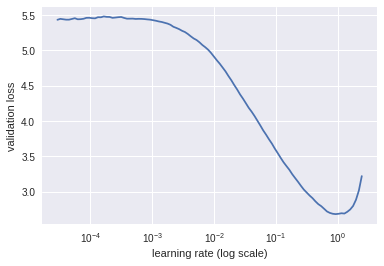

In [15]:
learn.sched.plot()

In [16]:
learn.fit(0.01,5,wds=1e-4, use_wd_sched=True)

epoch      trn_loss   val_loss   accuracy   
    0      1.082259   0.442752   0.898728  
    1      0.523319   0.361287   0.900685  
    2      0.369768   0.328634   0.905577  
    3      0.282753   0.309588   0.91047   
    4      0.232919   0.306013   0.906067  



[array([0.30601]), 0.9060665366700951]

In [0]:
learn.precompute=False


In [23]:
learn.fit(0.01,5,wds=1e-4, use_wd_sched=True)

epoch      trn_loss   val_loss   accuracy   
    0      1.146583   0.454788   0.882094  
    1      0.584784   0.358847   0.896282  
    2      0.42224    0.320968   0.905577  
    3      0.366337   0.313281   0.906556  
    4      0.316351   0.30302    0.90362   


[array([0.30302]), 0.9036203519005598]

In [38]:
lrs = np.array([1e-4,1e-3,1e-2])
learn.fit(lrs,3,wds=1e-4, use_wd_sched=True)

epoch      trn_loss   val_loss   accuracy   
    0      0.282381   0.297172   0.907045  
    1      0.26596    0.289823   0.90998   
    2      0.247252   0.285498   0.909491  


[array([0.2855]), 0.9094911929212671]

In [44]:
learn.unfreeze()
learn.fit(lrs,3,cycle_len=1,cycle_mult=2,wds=1e-4, use_wd_sched=True)

epoch      trn_loss   val_loss   accuracy   
    0      0.36466    0.35195    0.887965  
    1      0.308304   0.374443   0.886986  
    2      0.201772   0.349544   0.891879  
    3      0.211809   0.397767   0.880626  
    4      0.167618   0.375852   0.8909    
    5      0.120846   0.35953    0.890411  
    6      0.104947   0.361624   0.889432  


[array([0.36162]), 0.8894324854395395]

In [29]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [0]:
data.classes

In [0]:
preds= learn.predict(is_test=True)
preds = np.exp(preds)
test_data = os.listdir('test')

In [32]:
x = np.exp(preds[0])
x

array([0.00014, 0.00358, 0.00112, 0.0001 , 0.00002, 0.00001, 0.00005, 0.00002, 0.0001 , 0.00008, 0.00005,
       0.00027, 0.00068, 0.00013, 0.00095, 0.0001 , 0.00026, 0.00025, 0.00013, 0.     , 0.00025, 0.00003,
       0.00017, 0.00414, 0.0001 , 0.00052, 0.00016, 0.00007, 0.00017, 0.00004, 0.0005 , 0.00042, 0.0002 ,
       0.00007, 0.0002 , 0.00037, 0.00018, 0.00007, 0.00005, 0.00039, 0.00016, 0.00013, 0.00097, 0.00029,
       0.00063, 0.00003, 0.00297, 0.00013, 0.0002 , 0.00032, 0.00015, 0.0005 , 0.00166, 0.00004, 0.00035,
       0.00005, 0.00019, 0.00011, 0.0002 , 0.00067, 0.00001, 0.00048, 0.00245, 0.00008, 0.00003, 0.00011,
       0.00025, 0.00017, 0.00001, 0.91933, 0.00094, 0.00031, 0.00122, 0.00011, 0.00013, 0.00002, 0.00012,
       0.00002, 0.00552, 0.00003, 0.00021, 0.00009, 0.00045, 0.00211, 0.00019, 0.00159, 0.00007, 0.00026,
       0.00003, 0.00006, 0.00008, 0.00009, 0.02038, 0.00019, 0.00016, 0.00003, 0.00007, 0.00013, 0.0001 ,
       0.00012, 0.00005, 0.00007, 0.00021, 0.0

In [38]:
test_data[0][:-4]

'0e5df48c6a720cdce7bfcd8064e86f88'

In [0]:
subm = pd.DataFrame(data=preds,columns=data.classes,index=list(map(lambda x:x[:-4],test_data)))
subm.reset_index(inplace=True)
subm.rename(columns={'index':'id'},inplace=True)

In [35]:
subm.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0e5df48c6a720cdce7bfcd8064e86f88,0.000136,0.003577,0.001122,0.000098,2.237231e-05,1.156324e-05,4.568476e-05,0.000016,1.001747e-04,...,0.000044,1.805115e-05,0.000036,0.000149,0.000171,5.251188e-05,0.000053,4.654620e-05,0.000039,0.000063
1,fc14e1e96e898ebb963f1861666b7bae,0.000017,0.000016,0.000003,0.000004,5.274320e-07,2.750279e-06,1.446634e-06,0.000002,8.242760e-07,...,0.000063,2.921866e-06,0.000006,0.000002,0.000004,6.081323e-06,0.000002,1.889943e-06,0.000012,0.000088
2,02cc60bd987fc625224fa28da98f1fac,0.000011,0.000015,0.000009,0.000017,2.040429e-05,1.120639e-06,5.782358e-07,0.000006,7.475110e-05,...,0.000080,9.779804e-07,0.000003,0.000027,0.000052,1.409639e-05,0.000023,3.995758e-07,0.000003,0.000001
3,c5120a58c8b044f3968bb8bf8c281ac0,0.000004,0.000003,0.000002,0.000006,2.756455e-06,5.439711e-07,8.629478e-07,0.000007,1.764099e-06,...,0.036366,1.534198e-04,0.000003,0.000001,0.000002,6.537496e-07,0.000009,2.490910e-06,0.000057,0.000014
4,487982a60bb1c2d25aeb45afeb639fc0,0.000044,0.000039,0.000152,0.001092,1.191610e-04,1.142461e-02,2.684949e-05,0.000077,1.747427e-04,...,0.000120,1.154996e-04,0.000141,0.000117,0.000090,6.461064e-04,0.000106,2.393522e-05,0.000020,0.000047


In [0]:
subm.to_csv('submission_4.csv',index=False)

In [48]:
!kaggle competitions submit -c dog-breed-identification -f submission_4.csv -m "final submission"

Successfully submitted to Dog Breed Identification